In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('marketing_AB.csv', index_col = 0)

In [3]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [4]:
df.shape

(588101, 6)

In [5]:
df.columns

Index(['user id', 'test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        588101 non-null  int64 
 1   test group     588101 non-null  object
 2   converted      588101 non-null  bool  
 3   total ads      588101 non-null  int64 
 4   most ads day   588101 non-null  object
 5   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 27.5+ MB


In [7]:
print(df['test group'].value_counts())

test group
ad     564577
psa     23524
Name: count, dtype: int64


In [8]:
print(df['converted'].mean())

0.02523886203220195


In [9]:
conversion_by_group = df.groupby('test group')['converted'].agg(['mean', 'count', 'sum'])
conversion_by_group.columns = ['Conversion Rate', 'Total Users', 'Conversions']

In [10]:
print(conversion_by_group)

            Conversion Rate  Total Users  Conversions
test group                                           
ad                 0.025547       564577        14423
psa                0.017854        23524          420


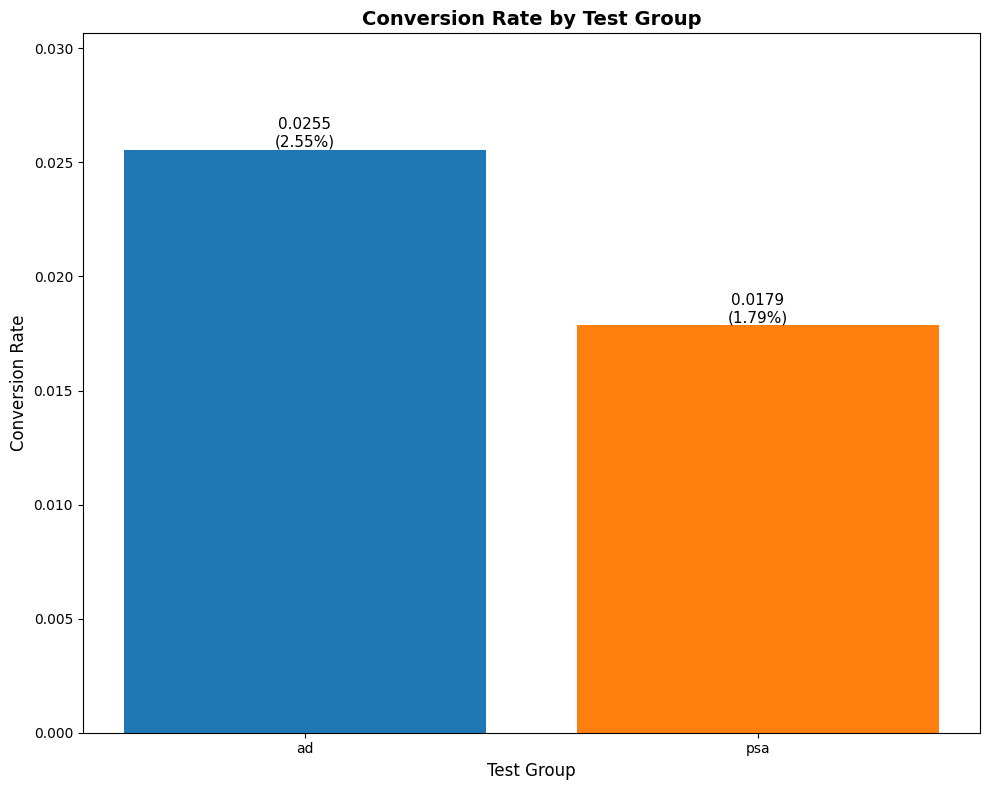

---Effect Size---
Control conversion rate: 0.0179 (1.79%)
Treatment conversion rate: 0.0255 (2.55%)
Absolute lift: 0.0077 (0.77 percentage points)
Relative lift: 0.4309 (43.09%)


In [11]:
plt.figure(figsize =(10,8))
plt.bar(conversion_by_group.index, conversion_by_group['Conversion Rate'], color=['#1f77b4', '#ff7f0e'])
plt.ylabel('Conversion Rate', fontsize=12)
plt.xlabel('Test Group', fontsize=12)
plt.title('Conversion Rate by Test Group', fontsize=14, fontweight='bold')
plt.ylim(0, max(conversion_by_group['Conversion Rate'])*1.2)

for i, (idx, row) in enumerate(conversion_by_group.iterrows()):
    plt.text(i, row['Conversion Rate'], f"{row['Conversion Rate']:.4f}\n({row['Conversion Rate']*100:.2f}%)",
             ha='center', va='bottom', fontsize=11)
    
plt.tight_layout()
plt.show()

control_rate = conversion_by_group.loc['psa', 'Conversion Rate']
treatment_rate = conversion_by_group.loc['ad', 'Conversion Rate']
absolute_diff = treatment_rate - control_rate
relative_diff = (treatment_rate - control_rate)/control_rate

print("---Effect Size---")
print(f"Control conversion rate: {control_rate:.4f} ({control_rate:.2%})")
print(f"Treatment conversion rate: {treatment_rate:.4f} ({treatment_rate:.2%})")
print(f"Absolute lift: {absolute_diff:.4f} ({absolute_diff*100:.2f} percentage points)")
print(f"Relative lift: {relative_diff:.4f} ({relative_diff:.2%})")

In [12]:
from scipy.stats import chi2_contingency

In [13]:
contingency = pd.crosstab(df['test group'], df['converted'])
print("Contingency Table")
print(contingency)
print()

chi2, p_value, dof, expected = chi2_contingency(contingency)

print("Statistical Test Results")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.10f}")
print(f"Degrees of freedom: {dof}")
print()

if p_value < 0.05:
    print("Results are statistically significant at the 0.05 level. The difference between groups is unlikely due to random chance. Run the campaign!")
else: 
    print("Results are not statistically significant at the 0.05 level. The difference between groups could be due to random chance. Need more data or the ads aren't effective enough.")

Contingency Table
converted    False  True 
test group               
ad          550154  14423
psa          23104    420

Statistical Test Results
Chi-square statistic: 54.0058
p-value: 0.0000000000
Degrees of freedom: 1

Results are statistically significant at the 0.05 level. The difference between groups is unlikely due to random chance. Run the campaign!
